In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Load the dataset

In [2]:
os.chdir(r"C:\Users\Bushra Ansari\Desktop\LMS DATASET\Principal Component Analysis\LMS")

In [3]:
df_house_price = pd.read_csv('HousePrices.csv') 

In [4]:
df_house_price.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_house_price.shape

(2073, 81)

In [6]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [9]:
df_house_price.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

###  Exploratory Data Analysis

In [10]:
len(df_house_price.columns)

81

df_house_price has 81 columns (79 features + id and target SalePrice) and 2073 entries (number of rows or house sales)

In [11]:
df_house_price[df_house_price.dtypes[df_house_price.dtypes=="object"].index]

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,...,BuiltIn,RFn,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2069,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Oth,Abnorml
2070,RL,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,P,NaN,NaN,NaN,WD,Normal
2071,RL,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,...,Basment,RFn,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml


In [12]:
numerical_var = df_house_price.dtypes[df_house_price.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_var))

categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"]
print("Number of Categorical features: ", len(categorical_var))

Number of Numerical features:  38
Number of Categorical features:  43


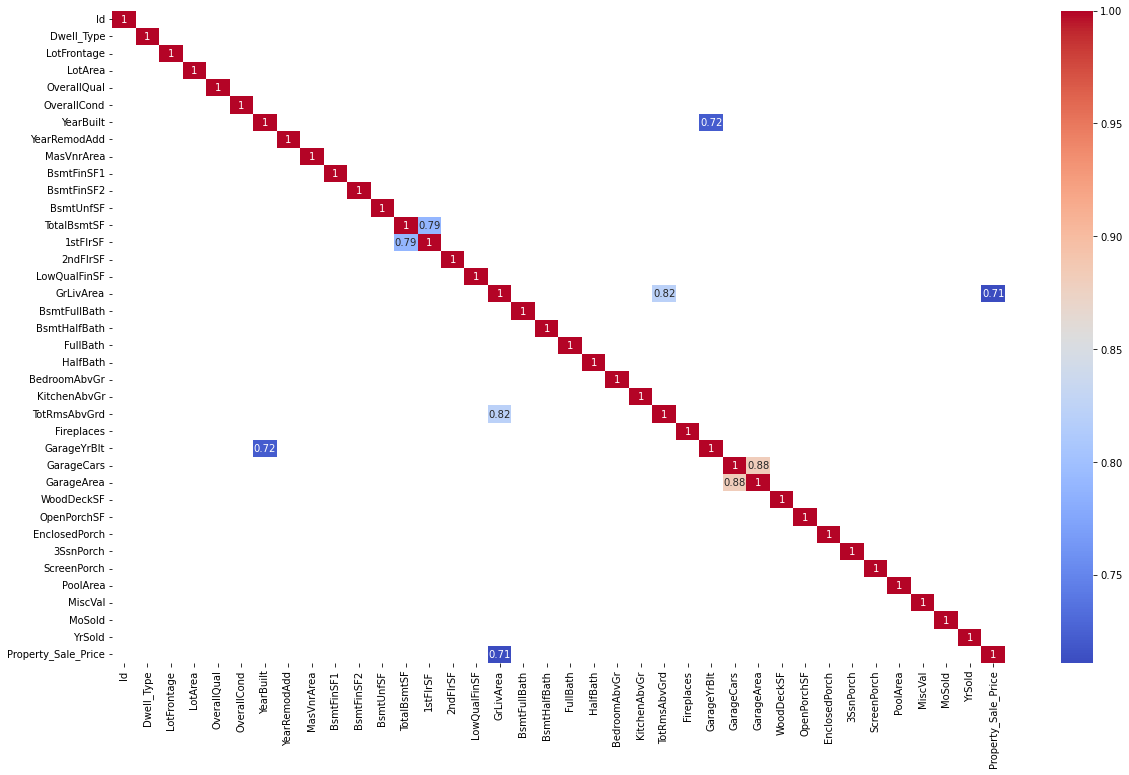

In [15]:
numerical_var = df_house_price.dtypes[df_house_price.dtypes != "object"].index
data_num = df_house_price[numerical_var]

categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"].index
data_cat = df_house_price[categorical_var]

#calculating correlation among numeric variable 
corr_matrix = data_num.corr() 

#filter correlation values above 0.7
filter_corr = corr_matrix[corr_matrix > 0.7]

plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap='coolwarm',
            annot=True);

Based on the above correlation matrix, correlation among the variables been observed. For example, 
"SalePrice" are correlated with "OverallQual" , "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", and "GarageArea". 

It also show the multicollinearity. For example: the correlation between GarageCars and GarageArea is very high (0.88)



### SalePrice


In [16]:
df_house_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2073.000,916.132,493.015,1.000,519.000,932.000,1302.000,1820.000
Dwell_Type,2073.000,60.556,159.925,20.000,20.000,50.000,70.000,7080.000
LotFrontage,1753.000,72.056,27.987,21.000,60.000,70.000,83.000,313.000
LotArea,2073.000,10717.853,9215.982,1300.000,7620.000,9492.000,11601.000,215245.000
OverallQual,2073.000,6.233,1.517,1.000,5.000,6.000,7.000,10.000
OverallCond,2073.000,5.835,1.360,1.000,5.000,5.000,7.000,9.000
YearBuilt,2073.000,1969.446,30.223,1872.000,1950.000,1971.000,1999.000,2010.000
YearRemodAdd,2073.000,1986.617,20.433,1950.000,1970.000,1995.000,2004.000,2023.000
MasVnrArea,2059.000,101.876,179.169,0.000,0.000,0.000,161.500,1600.000
BsmtFinSF1,2073.000,437.949,448.051,0.000,0.000,381.000,708.000,5644.000


<AxesSubplot:xlabel='Property_Sale_Price', ylabel='Density'>

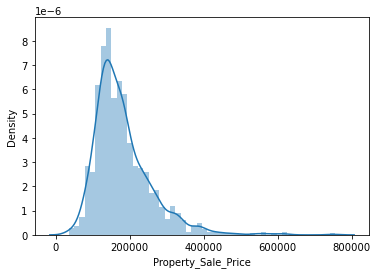

In [18]:
sns.distplot(df_house_price['Property_Sale_Price']) 

In [19]:
from scipy.stats import shapiro
shapiro(df_house_price['Property_Sale_Price'])

ShapiroResult(statistic=0.8739097714424133, pvalue=5.03303528652466e-38)

In [20]:
# box cox method   
from scipy.stats import boxcox
value, lambbda=boxcox(df_house_price['Property_Sale_Price'])

In [21]:
lambbda

-0.04375006731002627

<AxesSubplot:ylabel='Density'>

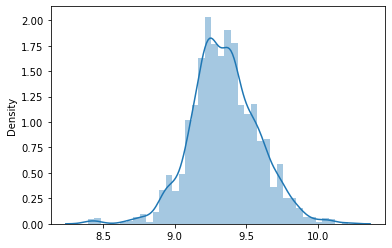

In [22]:
sns.distplot(value) 

In [23]:
shapiro(value)

ShapiroResult(statistic=0.9901770353317261, pvalue=1.171950869682803e-10)

From the above result, We can notice that values of "Property_Sale_Price" are not a normal distribution. It is positively skewed.

A Few people have very expensive house

### Relationship with numerical variables


### Overall Quality

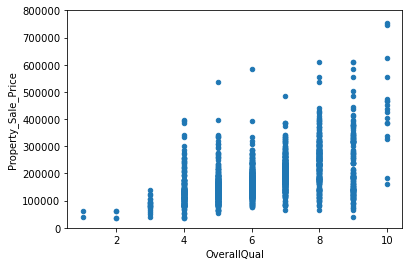

In [24]:
#scatter plot OverallQual/saleprice
data = pd.concat([df_house_price["Property_Sale_Price"], df_house_price["OverallQual"]],axis=1)
data.plot.scatter(x="OverallQual", y="Property_Sale_Price", ylim=(0,800000));

From the above result, We can say that the price of the house will be high when the overall quality of the house is high. We can notice that for the same quality different price.
"Property_Sale_Price" is correlated with other variables and "OverallQual" might be correlated with other variables. 

### Year Built


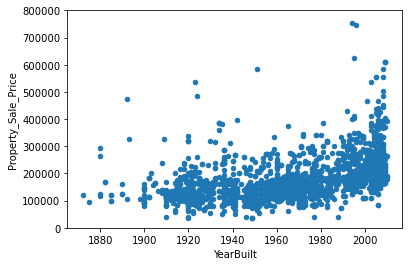

In [25]:
#scatter plot YearBuilt/saleprice
data = pd.concat([df_house_price["Property_Sale_Price"], df_house_price["YearBuilt"]],axis=1)
data.plot.scatter(x="YearBuilt", y="Property_Sale_Price", ylim=(0,800000));


From the above plot, we can observe that the price of a house is comparatively more when the house was built recently. We also can notice that there are some outlier which means even if the house is too old, the price of the house is moderately high due to influences of other variables.

### Ground Living Area

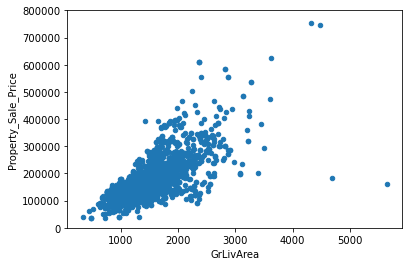

In [26]:
#scatter plot grlivarea/saleprice
data = pd.concat([df_house_price["Property_Sale_Price"], df_house_price["GrLivArea"]],axis=1)
data.plot.scatter(x="GrLivArea", y="Property_Sale_Price", ylim=(0,800000));

While the size of the ground living area is increasing, the price of the houses is increasing. But
even if the ground living area is high, the price of the house is low and when the ground living area is high, the price of the house is too high.

We know the influence of other variables affects the price change of house.

When "GrLivArea" of a house is highly correlated with other variables, the price of the house is increasing and when "GrLivArea" of a house is not highly correlated with other variables, the price of the house is decreasing.

### TotalBsmtSF

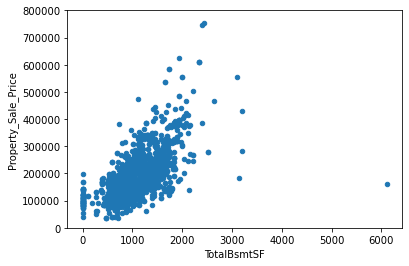

In [27]:
data = pd.concat([df_house_price["Property_Sale_Price"],df_house_price["TotalBsmtSF"]], axis=1)
data.plot.scatter(x="TotalBsmtSF", y="Property_Sale_Price", ylim=(0,800000));

We can notice that "Property_Sale_Price" and "TotalBsmtSF" is in a linear relationship. We can see the value of "Property_Sale_Price" is going straight when the value of "TotalBsmtSF" is 0. Total square feet of basement area of a house is high but the price of the house is low due to the influence of other variables.


### Visualizing categorical variables with "Property_Sale_Price"


### House Style

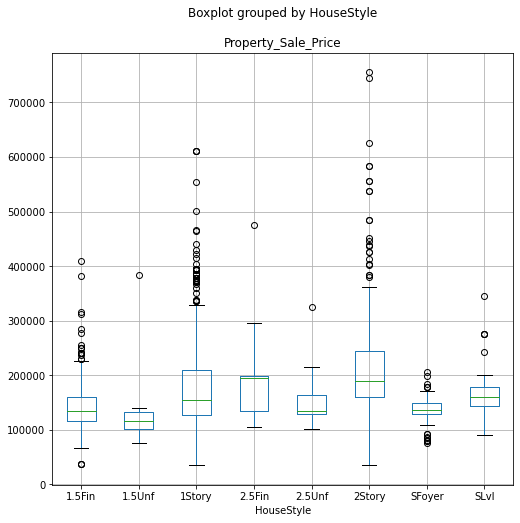

In [29]:
df_house_price.boxplot(column="Property_Sale_Price",      
                 by= "HouseStyle",       
                 figsize= (8,8))
plt.show()

### Foundation

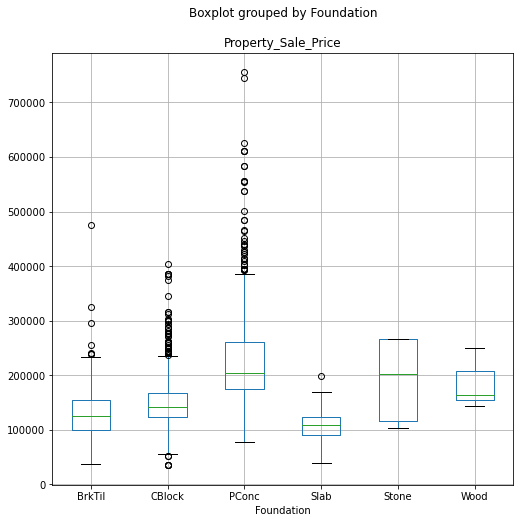

In [30]:
df_house_price.boxplot(column="Property_Sale_Price",      
                 by= "Foundation",        
                 figsize= (8,8))
plt.show()

From the above plot, we can observe that if a house has "Poured Concrete" foundation, the price of the house is higher than other house prices.

### Garage Quality

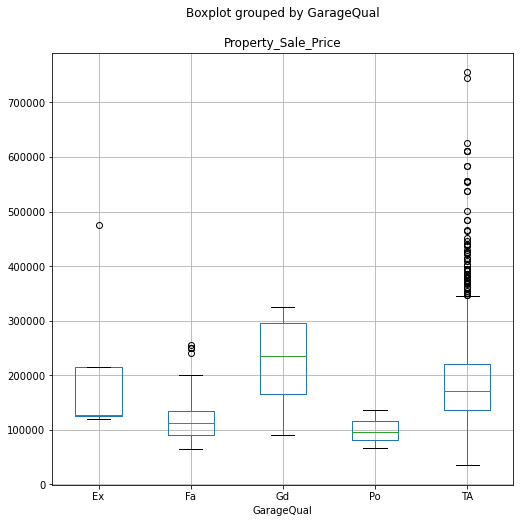

In [32]:
df_house_price.boxplot(column="Property_Sale_Price",        
                 by= "GarageQual",       
                 figsize= (8,8))
plt.show()

From the above plot, we can observe that if a house has a good garage, the price of the house is higher than other house prices. Some houses have an excellent garage. So the price of this kind of house is higher than all.

So far, we have compared some variables with the target variable. We observed that what is the variables impact on target variable based EDA. If we want to reduce dimension, we can take only impact variables. This is one kind of way. Now we will use PCA to reduce the dimension of this dataset.

### Imputing missing values

In [33]:
df_house_price.shape

(2073, 81)

In [34]:
pd.set_option("display.max_rows", 500)

In [35]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=df.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1

In [36]:
missingValues(df_house_price) 

,Missing,Percentage
PoolQC,2065,99.614
MiscFeature,1993,96.141
Alley,1944,93.777
Fence,1669,80.511
FireplaceQu,988,47.660
LotFrontage,320,15.437
GarageYrBlt,113,5.451
GarageCond,113,5.451
GarageType,113,5.451
GarageFinish,113,5.451


From above plot, We can see that which variable is correlated with "Property_Sale_Price".

### Imputing missing values

In [37]:
dff=df_house_price.copy()
dff["PoolQC_mii"]=np.where(dff["PoolQC"].isnull(),1,0)

In [38]:
dff["PoolQC_mii"].value_counts()

1    2065
0       8
Name: PoolQC_mii, dtype: int64

PooQC: Data description says NA means "No Pool". In this data set, it has huge ratio of missing value(99%) and majority of houses have no Pool at all in general.

In [39]:
df_house_price["PoolQC"].value_counts(dropna=False)

NaN    2065
Gd        4
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [40]:
df_house_price["PoolQC"] = df_house_price["PoolQC"].fillna("None")

### MiscFeature

Data description says NA means "no misc feature"

In [41]:
df_house_price["MiscFeature"] = df_house_price["MiscFeature"].fillna("None")

### Alley

Data description says NA means "no alley access"

In [42]:
df_house_price["Alley"] = df_house_price["Alley"].fillna("None")

### Fence

This column has NA value means "no fence"

In [43]:
df_house_price["Fence"] = df_house_price["Fence"].fillna("None")

### FireplaceQu

This column has NA means "no fireplace"

In [44]:
df_house_price["FireplaceQu"] = df_house_price["FireplaceQu"].fillna("None")

### LotFrontage

The area of each street connected to the house property most likely have a similar area to other houses in its neighborhood. So we can fill in missing values by the median LotFrontage of the neighborhood.

In [45]:
df_house_price["LotFrontage"] = df_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None


In [46]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_house_price[i] = df_house_price[i].fillna('None')

### GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [47]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_house_price[i] = df_house_price[i].fillna(0) 

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_house_price[i] = df_house_price[i].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [48]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_house_price[i] = df_house_price[i].fillna('None') 

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [49]:
df_house_price["MasVnrType"] = df_house_price["MasVnrType"].fillna("None")
df_house_price["MasVnrArea"] = df_house_price["MasVnrArea"].fillna(0) 

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.


In [52]:
df_house_price["Utilities"].value_counts()

AllPub    2070
NoSeWa       3
Name: Utilities, dtype: int64

In [53]:
df_house_price = df_house_price.drop(['Utilities'], axis=1)

In [63]:
df_house_price = df_house_price.drop(['Id'], axis=1)

Functional : data description says NA means typical

In [54]:
df_house_price["Functional"] = df_house_price["Functional"].fillna("Typ")

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value

In [55]:
df_house_price["Electrical"].value_counts(dropna=False)

SBrkr    1901
FuseA     127
FuseF      40
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [56]:
df_house_price['Electrical'] = df_house_price['Electrical'].fillna(df_house_price['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [57]:
df_house_price['KitchenQual'] = df_house_price['KitchenQual'].fillna(df_house_price['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [58]:
df_house_price['Exterior1st'] = df_house_price['Exterior1st'].fillna(df_house_price['Exterior1st'].mode()[0])
df_house_price['Exterior2nd'] = df_house_price['Exterior2nd'].fillna(df_house_price['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [59]:
df_house_price['SaleType'] = df_house_price['SaleType'].fillna(df_house_price['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [61]:
categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"]

Transforming some numerical variables that are really categorical

In [62]:
df_house_price['OverallCond'].dtype

dtype('int64')

In [65]:
#Changing OverallCond into a categorical variable
df_house_price['OverallCond'] = df_house_price['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df_house_price['YrSold'] = df_house_price['YrSold'].astype(str)
df_house_price['MoSold'] = df_house_price['MoSold'].astype(str)

Label Encoding some categorical variables that may contain information in their ordering set

In [66]:
df_house_price.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.000,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [73]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'PavedDrive', 'Alley', 'CentralAir', 'OverallCond', 
        'YrSold', 'MoSold')

In [74]:
# process columns, apply LabelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder() 
    label_ec.fit(list(df_house_price[c].values)) 
    df_house_price[c] = label_ec.transform(list(df_house_price[c].values))

In [75]:
df_house_price.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.000,8450,Pave,1,Reg,Lvl,Inside,0,...,0,3,4,None,0,4,2,WD,Normal,208500
1,20,RL,80.000,9600,Pave,1,Reg,Lvl,FR2,0,...,0,3,4,None,0,7,1,WD,Normal,181500
2,60,RL,68.000,11250,Pave,1,IR1,Lvl,Inside,0,...,0,3,4,None,0,11,2,WD,Normal,223500
3,70,RL,60.000,9550,Pave,1,IR1,Lvl,Corner,0,...,0,3,4,None,0,4,0,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,1,IR1,Lvl,FR2,0,...,0,3,4,None,0,3,2,WD,Normal,250000


In [76]:
df_house_price = pd.get_dummies(df_house_price, drop_first=False)
print(df_house_price.shape)

(2073, 225)


In [77]:
df_house_price

,Dwell_Type,LotFrontage,LotArea,Alley,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,1,0,7,4,2003,2003,196.000,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000,9600,1,0,6,7,1976,1976,0.000,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000,11250,1,0,7,4,2001,2002,162.000,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000,9550,1,0,7,4,1915,1970,0.000,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000,14260,1,0,8,4,2000,2000,350.000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,60,70.500,8755,1,0,8,3,1936,1999,298.000,...,0,0,0,1,0,0,0,0,1,0
2069,90,63.000,7711,1,0,6,8,1936,1977,0.000,...,0,0,1,0,1,0,0,0,0,0
2070,90,313.000,25000,1,0,4,5,1983,1996,0.000,...,0,0,0,1,0,0,0,0,1,0
2071,20,52.000,14375,1,0,9,5,1958,1958,541.000,...,0,0,0,0,1,0,0,0,0,0


In [78]:
X = df_house_price.drop('Property_Sale_Price',axis=1)  
y=df_house_price["Property_Sale_Price"]

In [79]:
X

,Dwell_Type,LotFrontage,LotArea,Alley,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,1,0,7,4,2003,2003,196.000,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000,9600,1,0,6,7,1976,1976,0.000,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000,11250,1,0,7,4,2001,2002,162.000,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000,9550,1,0,7,4,1915,1970,0.000,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000,14260,1,0,8,4,2000,2000,350.000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,60,70.500,8755,1,0,8,3,1936,1999,298.000,...,0,0,0,1,0,0,0,0,1,0
2069,90,63.000,7711,1,0,6,8,1936,1977,0.000,...,0,0,1,0,1,0,0,0,0,0
2070,90,313.000,25000,1,0,4,5,1983,1996,0.000,...,0,0,0,1,0,0,0,0,1,0
2071,20,52.000,14375,1,0,9,5,1958,1958,541.000,...,0,0,0,0,1,0,0,0,0,0



### Standardizing input variables

In [80]:
from sklearn.preprocessing import StandardScaler  

sc_x = StandardScaler()  
sc_x_fit=sc_x.fit(X)
X_std = sc_x_fit.transform(X)


In [81]:
X_std1=pd.DataFrame(X_std, columns=X.columns)

In [82]:
X_std1

,Dwell_Type,LotFrontage,LotArea,Alley,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.003,-0.270,-0.246,0.029,-0.232,0.505,-0.614,1.111,0.802,0.531,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
1,-0.254,0.308,-0.121,0.029,-0.232,-0.154,1.592,0.217,-0.520,-0.566,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
2,-0.003,-0.154,0.058,0.029,-0.232,0.505,-0.614,1.044,0.753,0.340,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
3,0.059,-0.462,-0.127,0.029,-0.232,0.505,-0.614,-1.802,-0.813,-0.566,...,-0.049,-0.300,-0.049,0.392,3.518,-0.049,-0.096,-0.108,-2.118,-0.304
4,-0.003,0.462,0.384,0.029,-0.232,1.165,-0.614,1.011,0.655,1.392,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,-0.003,-0.058,-0.213,0.029,-0.232,1.165,-1.349,-1.107,0.606,1.101,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
2069,0.184,-0.347,-0.326,0.029,-0.232,-0.154,2.327,-1.107,-0.471,-0.566,...,-0.049,-0.300,20.337,-2.552,3.518,-0.049,-0.096,-0.108,-2.118,-0.304
2070,0.184,9.280,1.550,0.029,-0.232,-1.473,0.121,0.449,0.459,-0.566,...,-0.049,-0.300,-0.049,0.392,-0.284,-0.049,-0.096,-0.108,0.472,-0.304
2071,-0.254,-0.770,0.397,0.029,-0.232,1.824,0.121,-0.379,-1.401,2.461,...,-0.049,-0.300,-0.049,-2.552,3.518,-0.049,-0.096,-0.108,-2.118,-0.304


# PCA using sklearn

We have 224 columns. So first we choose 224 components

In [83]:
X.shape

(2073, 224)

In [84]:
from sklearn.decomposition import PCA

sklearn_pca = PCA()

sklearn_pca_fit=sklearn_pca.fit(X_std1)
pca_result=sklearn_pca_fit.transform(X_std1)

In [85]:
pca_result

array([[ 3.08867767e+00, -1.16845883e+00, -6.36918579e-01, ...,
         1.67128345e-16,  6.86390149e-16,  4.62904443e-16],
       [-4.44307639e-01,  2.83678339e+00, -4.34586385e-01, ...,
         1.95042408e-15, -8.60983192e-16, -1.32105709e-16],
       [ 3.57292945e+00, -6.46685760e-01, -1.86682518e-01, ...,
         4.44684101e-16,  2.02563339e-17,  6.29437897e-16],
       ...,
       [-4.63283879e-01,  2.82816954e+00,  2.47435956e+00, ...,
         1.18556088e-16, -1.44381356e-17,  1.31118422e-15],
       [-3.96180479e-01,  3.35027385e+00,  1.01647162e+00, ...,
         1.09694013e-15, -9.52923536e-16, -1.63567728e-15],
       [-2.84954139e+00, -2.20697612e+00,  1.26617543e+00, ...,
        -3.63697038e-16,  2.21484257e-16, -2.43061431e-15]])

In [86]:
pd.DataFrame(pca_result)

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,3.089,-1.168,-0.637,-2.641,0.082,0.825,-0.646,0.340,-0.686,-1.060,...,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000
1,-0.444,2.837,-0.435,-0.205,-0.173,0.172,1.136,-0.038,0.049,0.688,...,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000
2,3.573,-0.647,-0.187,-2.737,-0.145,1.647,-0.708,0.480,-0.391,-1.123,...,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,-1.965,-1.295,2.431,0.247,-1.923,0.148,1.268,-0.465,-1.099,1.136,...,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
4,5.541,-0.369,2.302,-3.013,0.244,0.930,-0.100,-0.051,-0.244,-1.927,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,3.396,-1.056,2.193,-3.198,0.203,2.296,0.558,1.967,2.188,-2.306,...,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000
2069,-3.182,-1.059,-0.636,4.324,7.104,0.236,-4.124,-3.075,4.979,-1.724,...,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000
2070,-0.463,2.828,2.474,1.986,2.482,-0.569,-2.115,3.346,1.327,-0.833,...,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
2071,-0.396,3.350,1.016,0.982,-0.883,-2.335,-1.055,-0.991,1.143,0.835,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000


In [87]:
pd.DataFrame(pca_result, columns=['Pc1', 'Pc2', 'Pc3', 'Pc4', 'Pc5', 'Pc6', 'Pc7', 'Pc8', 'Pc9', 'Pc10', 'Pc11', 'Pc12', 'Pc13', 'Pc14', 'Pc15', 'Pc16', 'Pc17', 'Pc18', 'Pc19', 'Pc20', 'Pc21', 'Pc22', 'Pc23', 'Pc24', 'Pc25', 'Pc26', 'Pc27', 'Pc28', 'Pc29', 'Pc30', 'Pc31', 'Pc32', 'Pc33', 'Pc34', 'Pc35', 'Pc36', 'Pc37', 'Pc38', 'Pc39', 'Pc40', 'Pc41', 'Pc42', 'Pc43', 'Pc44', 'Pc45', 'Pc46', 'Pc47', 'Pc48', 'Pc49', 'Pc50', 'Pc51', 'Pc52', 'Pc53', 'Pc54', 'Pc55', 'Pc56', 'Pc57', 'Pc58', 'Pc59', 'Pc60', 'Pc61', 'Pc62', 'Pc63', 'Pc64', 'Pc65', 'Pc66', 'Pc67', 'Pc68', 'Pc69', 'Pc70', 'Pc71', 'Pc72', 'Pc73', 'Pc74', 'Pc75', 'Pc76', 'Pc77', 'Pc78', 'Pc79', 'Pc80', 'Pc81', 'Pc82', 'Pc83', 'Pc84', 'Pc85', 'Pc86', 'Pc87', 'Pc88', 'Pc89', 'Pc90', 'Pc91', 'Pc92', 'Pc93', 'Pc94', 'Pc95', 'Pc96', 'Pc97', 'Pc98', 'Pc99', 'Pc100', 'Pc101', 'Pc102', 'Pc103', 'Pc104', 'Pc105', 'Pc106', 'Pc107', 'Pc108', 'Pc109', 'Pc110', 'Pc111', 'Pc112', 'Pc113', 'Pc114', 'Pc115', 'Pc116', 'Pc117', 'Pc118', 'Pc119', 'Pc120', 'Pc121', 'Pc122', 'Pc123', 'Pc124', 'Pc125', 'Pc126', 'Pc127', 'Pc128', 'Pc129', 'Pc130', 'Pc131', 'Pc132', 'Pc133', 'Pc134', 'Pc135', 'Pc136', 'Pc137', 'Pc138', 'Pc139', 'Pc140', 'Pc141', 'Pc142', 'Pc143', 'Pc144', 'Pc145', 'Pc146', 'Pc147', 'Pc148', 'Pc149', 'Pc150', 'Pc151', 'Pc152', 'Pc153', 'Pc154', 'Pc155', 'Pc156', 'Pc157', 'Pc158', 'Pc159', 'Pc160', 'Pc161', 'Pc162', 'Pc163', 'Pc164', 'Pc165', 'Pc166', 'Pc167', 'Pc168', 'Pc169', 'Pc170', 'Pc171', 'Pc172', 'Pc173', 'Pc174', 'Pc175', 'Pc176', 'Pc177', 'Pc178', 'Pc179', 'Pc180', 'Pc181', 'Pc182', 'Pc183', 'Pc184', 'Pc185', 'Pc186', 'Pc187', 'Pc188', 'Pc189', 'Pc190', 'Pc191', 'Pc192', 'Pc193', 'Pc194', 'Pc195', 'Pc196', 'Pc197', 'Pc198', 'Pc199', 'Pc200', 'Pc201', 'Pc202', 'Pc203', 'Pc204', 'Pc205', 'Pc206', 'Pc207', 'Pc208', 'Pc209', 'Pc210', 'Pc211','Pc212', 'Pc213', 'Pc214', 'Pc215', 'Pc216', 'Pc217', 'Pc218', 'Pc219', 'Pc220', 'Pc21', 'Pc22', 'Pc23', 'Pc24'])

,Pc1,Pc2,Pc3,Pc4,Pc5,Pc6,Pc7,Pc8,Pc9,Pc10,...,Pc215,Pc216,Pc217,Pc218,Pc219,Pc220,Pc21,Pc22,Pc23,Pc24
0,3.089,-1.168,-0.637,-2.641,0.082,0.825,-0.646,0.340,-0.686,-1.060,...,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000
1,-0.444,2.837,-0.435,-0.205,-0.173,0.172,1.136,-0.038,0.049,0.688,...,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000
2,3.573,-0.647,-0.187,-2.737,-0.145,1.647,-0.708,0.480,-0.391,-1.123,...,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,-1.965,-1.295,2.431,0.247,-1.923,0.148,1.268,-0.465,-1.099,1.136,...,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
4,5.541,-0.369,2.302,-3.013,0.244,0.930,-0.100,-0.051,-0.244,-1.927,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,3.396,-1.056,2.193,-3.198,0.203,2.296,0.558,1.967,2.188,-2.306,...,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000
2069,-3.182,-1.059,-0.636,4.324,7.104,0.236,-4.124,-3.075,4.979,-1.724,...,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000
2070,-0.463,2.828,2.474,1.986,2.482,-0.569,-2.115,3.346,1.327,-0.833,...,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
2071,-0.396,3.350,1.016,0.982,-0.883,-2.335,-1.055,-0.991,1.143,0.835,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000


In [88]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(sklearn_pca_fit.explained_variance_)

,0
0,13.617
1,6.839
2,5.648
3,4.941
4,3.954
5,3.728
6,3.700
7,3.492
8,3.404
9,3.104


In [89]:
eigen=pd.DataFrame({"Eigen":sklearn_pca_fit.explained_variance_, 
              "Ver_explained":sklearn_pca_fit.explained_variance_ratio_,
             "Cumm_var":sklearn_pca_fit.explained_variance_ratio_.cumsum()})

In [90]:
eigen

,Eigen,Ver_explained,Cumm_var
0,13.617,0.061,0.061
1,6.839,0.031,0.091
2,5.648,0.025,0.116
3,4.941,0.022,0.139
4,3.954,0.018,0.156
5,3.728,0.017,0.173
6,3.700,0.017,0.189
7,3.492,0.016,0.205
8,3.404,0.015,0.220
9,3.104,0.014,0.234


In [91]:
eigen[eigen["Cumm_var"]<=.75] 

,Eigen,Ver_explained,Cumm_var
0,13.617,0.061,0.061
1,6.839,0.031,0.091
2,5.648,0.025,0.116
3,4.941,0.022,0.139
4,3.954,0.018,0.156
5,3.728,0.017,0.173
6,3.700,0.017,0.189
7,3.492,0.016,0.205
8,3.404,0.015,0.220
9,3.104,0.014,0.234


In [92]:
eigen[eigen["Eigen"]>=1]

,Eigen,Ver_explained,Cumm_var
0,13.617,0.061,0.061
1,6.839,0.031,0.091
2,5.648,0.025,0.116
3,4.941,0.022,0.139
4,3.954,0.018,0.156
5,3.728,0.017,0.173
6,3.700,0.017,0.189
7,3.492,0.016,0.205
8,3.404,0.015,0.220
9,3.104,0.014,0.234


In [93]:
pcs82=PCA(n_components=82)
pcs82_fit=pcs82.fit(X_std1)
X_pcs=pcs82_fit.transform(X_std1)

In [94]:
pc_X=pd.DataFrame(X_pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70', 'PC71','PC72','PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79','PC80','PC81', 'PC82'])

In [95]:
y=df_house_price["Property_Sale_Price"] 

In [96]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(pc_X, y) 

LinearRegression()

In [97]:
lr.score(pc_X, y)

0.8646334872800795

In [98]:
lr=LinearRegression()
lr.fit(X_std1, y)
lr.score(X_std1, y)

0.9160364380101469

In [99]:
X_std1.shape

(2073, 224)

In [100]:
pc_X.shape

(2073, 82)

## Linear Regression With OLS

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(pc_X,y, test_size = 0.25, random_state = 5)

In [105]:
x_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64',
       'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73',
       'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82'],
      dtype='object')

In [106]:
import statsmodels.api as sm  

X = x_train[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64',
       'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73',
       'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82'
        ]]

Y = y_train

X = sm.add_constant(X)



model = sm.OLS(Y, X).fit()



print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.872
Model:                             OLS   Adj. R-squared:                  0.865
Method:                  Least Squares   F-statistic:                     122.2
Date:                 Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                         20:43:44   Log-Likelihood:                -18172.
No. Observations:                 1554   AIC:                         3.651e+04
Df Residuals:                     1471   BIC:                         3.695e+04
Df Model:                           82                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.814e+05    782.648    231.74

In [108]:
cols_selected = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64',
       'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73',
       'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82']

In [110]:
x_train1=x_train[cols_selected]
x = sm.add_constant(x_train1)

In [111]:
predYTrain = model.predict(x)
actYTrain = y_train

In [112]:
print('MSE :', np.mean((predYTrain - actYTrain)**2))

print('RMSE :', np.sqrt(np.mean((predYTrain - actYTrain)**2)))

print('Mean Absolute Error(MAE) :', np.mean(abs(predYTrain - actYTrain)))

print('Mean Absolute Percentage Error(MAPE) :', np.mean(abs((actYTrain - predYTrain)/actYTrain)))

MSE : 840329480.3209817
RMSE : 28988.437010659643
Mean Absolute Error(MAE) : 19718.920154048923
Mean Absolute Percentage Error(MAPE) : 0.12040708356583807


In [114]:
x_test1=x_test[cols_selected]
x = sm.add_constant(x_test1)

predYTest = model.predict(x)

actYTest = y_test

print('MSE :', np.mean((predYTest - actYTest)**2))

print('RMSE :', np.sqrt(np.mean((predYTest - actYTest)**2)))

print('Mean Absolute Error(MAE) :', np.mean(abs(predYTest - actYTest)))

print('Mean Absolute Percentage Error(MAPE) :', np.mean(abs((actYTest - predYTest)/actYTest)))

MSE : 1886674940.0549967
RMSE : 43435.871581620144
Mean Absolute Error(MAE) : 21583.583496472424
Mean Absolute Percentage Error(MAPE) : 0.12966558198935668


In [116]:
act_pred = pd.DataFrame({'ActPrice' : actYTrain, 'PredPrice' : predYTrain})

<AxesSubplot:>

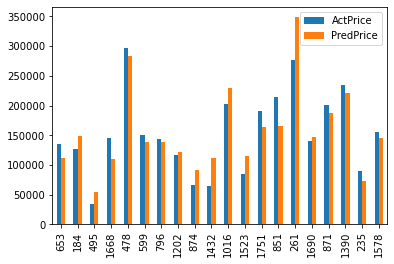

In [117]:
act_pred.head(20).plot(kind = 'bar')